# Accumulated Local Effects plots
This script serves to reproduce the plots which are shown in the paper.

## Importing the AccumulatedLocalEffects class

In [1]:
from ale import AccumulatedLocalEffects

## Importing the [data sets (TODO)](https://www.youtube.com/watch?v=dQw4w9WgXcQ&ab_channel=RickAstleyVEVO)

In [2]:
import numpy as np

# Training data sets
MI_LSD_SET03_X_train = np.load('data/MI-LSD-SET03_X_train.npy')
MI_LSD_SET03_y_train = np.load('data/MI-LSD-SET03_y_train.npy')

LSD_SET03_X_train = (MI_LSD_SET03_X_train[:, 0:16] + 
                     MI_LSD_SET03_X_train[:, 16:32] +
                     MI_LSD_SET03_X_train[:, 32:48] +
                     MI_LSD_SET03_X_train[:, 48:64])
LSD_SET03_y_train = MI_LSD_SET03_y_train

MI_LSD_SET03_sO2_X_train = np.load('data/MI-LSD-SET03-sO2_X_train.npy')
MI_LSD_SET03_sO2_y_train = np.load('data/MI-LSD-SET03-sO2_y_train.npy')

LSD_SET03_sO2_X_train = (MI_LSD_SET03_sO2_X_train[:, 0:16] + 
                         MI_LSD_SET03_sO2_X_train[:, 16:32] +
                         MI_LSD_SET03_sO2_X_train[:, 32:48] +
                         MI_LSD_SET03_sO2_X_train[:, 48:64])
LSD_SET03_sO2_y_train = MI_LSD_SET03_sO2_y_train

# Test data sets
MI_LSD_SET03_X_test = np.load('data/MI-LSD-SET03_X_test.npy')
MI_LSD_SET03_y_test = np.load('data/MI-LSD-SET03_y_test.npy')

MI_LSD_PHANTOMB_X_test = np.load('data/MI-LSD-PHANTOMB_X_test.npy')
MI_LSD_PHANTOMB_y_test = np.load('data/MI-LSD-PHANTOMB_y_test.npy')

MI_LSD_PHANTOMC_X_test = np.load('data/MI-LSD-PHANTOMC_X_test.npy')
MI_LSD_PHANTOMC_y_test = np.load('data/MI-LSD-PHANTOMC_y_test.npy')

LSD_SET03_X_test = (MI_LSD_SET03_X_test[:, 0:16] + 
                    MI_LSD_SET03_X_test[:, 16:32] +
                    MI_LSD_SET03_X_test[:, 32:48] +
                    MI_LSD_SET03_X_test[:, 48:64])
LSD_SET03_y_test = MI_LSD_SET03_y_test

LSD_PHANTOMB_X_test = (MI_LSD_PHANTOMB_X_test[:, 0:16] + 
                       MI_LSD_PHANTOMB_X_test[:, 16:32] +
                       MI_LSD_PHANTOMB_X_test[:, 32:48] +
                       MI_LSD_PHANTOMB_X_test[:, 48:64])
LSD_PHANTOMB_y_test = MI_LSD_PHANTOMB_y_test

LSD_PHANTOMC_X_test = (MI_LSD_PHANTOMC_X_test[:, 0:16] + 
                       MI_LSD_PHANTOMC_X_test[:, 16:32] +
                       MI_LSD_PHANTOMC_X_test[:, 32:48] +
                       MI_LSD_PHANTOMC_X_test[:, 48:64])
LSD_PHANTOMC_y_test = MI_LSD_PHANTOMC_y_test

MI_LSD_SET03_sO2_X_test = np.load('data/MI-LSD-SET03-sO2_X_test.npy')
MI_LSD_SET03_sO2_y_test = np.load('data/MI-LSD-SET03-sO2_y_test.npy')

LSD_SET03_sO2_X_test = (MI_LSD_SET03_sO2_X_test[:, 0:16] + 
                        MI_LSD_SET03_sO2_X_test[:, 16:32] +
                        MI_LSD_SET03_sO2_X_test[:, 32:48] +
                        MI_LSD_SET03_sO2_X_test[:, 48:64])
LSD_SET03_sO2_y_test = MI_LSD_SET03_sO2_y_test

## Initializing the [LightGBM regressor](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMRegressor.html)

In [3]:
from lightgbm import LGBMRegressor

reg = LGBMRegressor(objective='cross_entropy',
                    n_estimators=300,
                    num_leaves=100,
                    seed=1)

## Instance of the AccumulatedLocalEffects class

In [4]:
ALE = AccumulatedLocalEffects(reg=reg,
                              filename='plots/MI_LSD_SET03',
                              X_train=MI_LSD_SET03_X_train,
                              y_train=MI_LSD_SET03_y_train,
                              num_illum=4,
                              num_wlen=16,
                              num_subintervals=200,
                              num_x_values=50,
                              data_reduction=0.01) 

## Multiple illumination learned spectral decoloring (MI-LSD) for rCu

### Plotting the ALE functions

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


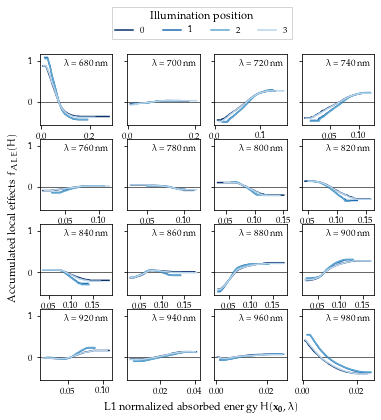

In [6]:
ALE.plot_ALE_function(illum_pos=[0, 1, 2, 3])

### Plotting the 'feature clipping' MAE-progressions
**SET03**

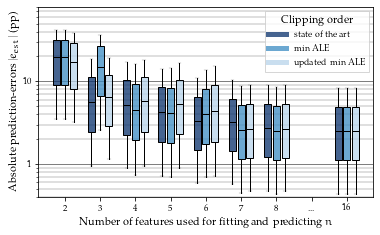

In [7]:
MI_LSD_SET03_stats = ALE.plot_feature_clipping(MI_LSD_SET03_X_test,
                                               MI_LSD_SET03_y_test,
                                               illum_pos=[0, 1, 2, 3],
                                               clipping_order=['state_of_the_art', 'min_ALE', 'updated_min_ALE'],
                                               n_shown=[2, 3, 4, 5, 6, 7, 8, '...', 16])

Ordered feature indices.

In [8]:
print(MI_LSD_SET03_stats['state_of_the_art'][0])
print(MI_LSD_SET03_stats['min_ALE'][0])
print(MI_LSD_SET03_stats['updated_min_ALE'][0])

[ 0. 13.  2. 11.  4.  9.  6.  7.]
[15.  2. 10.  3. 11.  7.  6.  1.]
[15.  8. 10.  6.  2.  0.  5.  1.]


Median absolute errors.

In [9]:
print(MI_LSD_SET03_stats['state_of_the_art'][3])
print(MI_LSD_SET03_stats['min_ALE'][3])
print(MI_LSD_SET03_stats['updated_min_ALE'][3])

[19.48940958  5.63215311  5.12892251  4.27028341  3.34058425  3.20605987
  2.75291995  2.52312129]
[19.49083772 15.1076115   4.50628065  4.12501867  4.02184258  2.60534612
  2.51639003  2.52312129]
[17.12246648  6.39527743  5.76163688  5.35213223  4.33059345  2.68396257
  2.68675115  2.52312129]


90th percentiles.

In [10]:
print(MI_LSD_SET03_stats['state_of_the_art'][5])
print(MI_LSD_SET03_stats['min_ALE'][5])
print(MI_LSD_SET03_stats['updated_min_ALE'][5])

[41.31097822 18.63251901 17.22356484 14.16078233 10.97002308 10.26917558
  9.05179644  8.24926325]
[41.31168738 36.62705951 16.38423901 14.52897759 13.68948554  8.81851618
  8.47463896  8.24926325]
[38.65883897 19.1010708  18.15475774 16.8790768  15.34937368  9.04077286
  9.00808914  8.24926325]


**PHANTOMB**

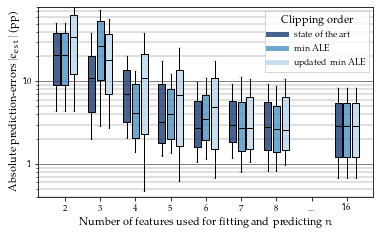

In [11]:
ALE.filename = 'plots/MI_LSD_PHANTOMB'

MI_LSD_PHANTOMB_stats = ALE.plot_feature_clipping(MI_LSD_PHANTOMB_X_test,
                                                  MI_LSD_PHANTOMB_y_test,
                                                  illum_pos=[0, 1, 2, 3],
                                                  clipping_order=['state_of_the_art', 'min_ALE', 'updated_min_ALE'],
                                                  n_shown=[2, 3, 4, 5, 6, 7, 8, '...', 16])

Ordered feature indices.

In [12]:
print(MI_LSD_PHANTOMB_stats['state_of_the_art'][0])
print(MI_LSD_PHANTOMB_stats['min_ALE'][0])
print(MI_LSD_PHANTOMB_stats['updated_min_ALE'][0])

[ 0. 13.  2. 11.  4.  9.  6.  7.]
[15.  2. 10.  3. 11.  7.  6.  1.]
[15.  8. 10.  6.  2.  0.  5.  1.]


Median absolute errors.

In [13]:
print(MI_LSD_PHANTOMB_stats['state_of_the_art'][3])
print(MI_LSD_PHANTOMB_stats['min_ALE'][3])
print(MI_LSD_PHANTOMB_stats['updated_min_ALE'][3])

[20.7205953  10.82907464  6.94671251  3.24376348  2.71393151  2.94545441
  2.78929149  2.84762881]
[20.7317354  26.74197138  4.1805008   4.00044757  3.50428941  2.72858843
  2.66040025  2.84762881]
[34.53107184 18.25609804 11.04330954  6.90639131  4.91843783  2.73049807
  2.5580241   2.84762881]


90th percentiles.

In [14]:
print(MI_LSD_PHANTOMB_stats['state_of_the_art'][5])
print(MI_LSD_PHANTOMB_stats['min_ALE'][5])
print(MI_LSD_PHANTOMB_stats['updated_min_ALE'][5])

[51.30301997 38.49188035 20.39257921 17.47427296  9.95400535  9.26614744
  9.33741628  8.32477592]
[51.45126712 72.16333875 13.47151085 12.34510601 11.11407917 11.3365462
  8.70650604  8.32477592]
[83.07660603 57.09477199 38.21232283 25.14016015 17.6685043  10.76998081
 10.67057449  8.32477592]


**PHANTOMC**

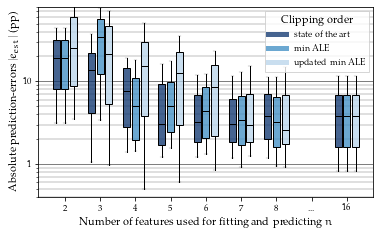

In [15]:
ALE.filename = 'plots/MI_LSD_PHANTOMC'

MI_LSD_PHANTOMC_stats = ALE.plot_feature_clipping(MI_LSD_PHANTOMC_X_test, 
                                                  MI_LSD_PHANTOMC_y_test,
                                                  illum_pos=[0, 1, 2, 3],
                                                  clipping_order=['state_of_the_art', 'min_ALE', 'updated_min_ALE'],
                                                  n_shown=[2, 3, 4, 5, 6, 7, 8, '...', 16])

Ordered feature indices.

In [16]:
print(MI_LSD_PHANTOMC_stats['state_of_the_art'][0])
print(MI_LSD_PHANTOMC_stats['min_ALE'][0])
print(MI_LSD_PHANTOMC_stats['updated_min_ALE'][0])

[ 0. 13.  2. 11.  4.  9.  6.  7.]
[15.  2. 10.  3. 11.  7.  6.  1.]
[15.  8. 10.  6.  2.  0.  5.  1.]


Median absolute errors.

In [17]:
print(MI_LSD_PHANTOMC_stats['state_of_the_art'][3])
print(MI_LSD_PHANTOMC_stats['min_ALE'][3])
print(MI_LSD_PHANTOMC_stats['updated_min_ALE'][3])

[19.31464421 13.60101221  7.55627707  3.04994385  3.24640722  3.08624254
  3.79657819  3.77782088]
[19.35387343 34.14968841  5.08423491  5.07110132  4.37609022  3.41699111
  3.22259487  3.77782088]
[25.072271   21.69417855 15.53856015 12.55793754  8.60797383  2.92774303
  2.58190621  3.77782088]


90th percentile.

In [18]:
print(MI_LSD_PHANTOMC_stats['state_of_the_art'][5])
print(MI_LSD_PHANTOMC_stats['min_ALE'][5])
print(MI_LSD_PHANTOMC_stats['updated_min_ALE'][5])

[43.72304674 37.7678102  19.25198435 16.29564803 11.86709535 11.72019872
 11.3027898  11.47081248]
[43.7836927  76.05448079 18.01706684 17.43937685 12.16447257 13.03859129
 11.36577199 11.47081248]
[84.43089555 71.50854631 51.41237012 35.54873404 23.56351769 15.46874552
 14.95539127 11.47081248]


## Learned spectral decoloring (LSD) for rCu

In [19]:
ALE.filename = 'plots/LSD_SET03'
ALE.X_train = LSD_SET03_X_train
ALE.y_train = LSD_SET03_y_train
ALE.num_illum = 1

### Plotting the ALE functions

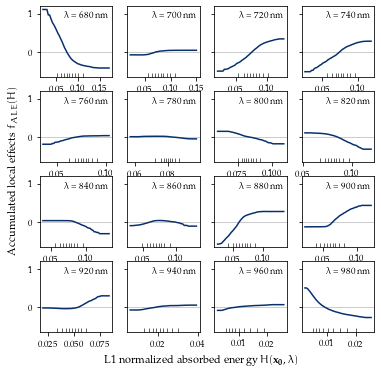

In [20]:
ALE.plot_ALE_function()

### Plotting the 'feature clipping' MAE-progressions
**SET03**

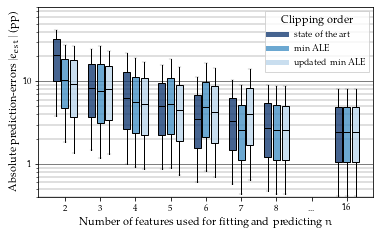

In [21]:
LSD_SET03_stats = ALE.plot_feature_clipping(LSD_SET03_X_test,
                                            LSD_SET03_y_test,
                                            clipping_order=['state_of_the_art', 'min_ALE', 'updated_min_ALE'],
                                            n_shown=[2, 3, 4, 5, 6, 7, 8, '...', 16])

Ordered feature indices.

In [22]:
print(LSD_SET03_stats['state_of_the_art'][0])
print(LSD_SET03_stats['min_ALE'][0])
print(LSD_SET03_stats['updated_min_ALE'][0])

[ 0. 13.  2. 11.  4.  9.  6.  7.]
[10.  2.  3. 15. 11.  7. 12.  5.]
[ 8.  0.  2.  3. 11.  7. 15.  5.]


Median absolute errors.

In [23]:
print(LSD_SET03_stats['state_of_the_art'][3])
print(LSD_SET03_stats['min_ALE'][3])
print(LSD_SET03_stats['updated_min_ALE'][3])

[20.96829576  8.23080042  6.31394667  5.02404734  3.48379593  3.2965254
  2.75253037  2.43036723]
[10.29515374  7.63148827  5.54772029  5.31240384  4.86963534  2.59099423
  2.54924878  2.43036723]
[9.3264998  8.14628552 5.38443266 4.47971468 4.24578492 4.01225253
 2.54492478 2.43036723]


90th percentile.

In [24]:
print(LSD_SET03_stats['state_of_the_art'][5])
print(LSD_SET03_stats['min_ALE'][5])
print(LSD_SET03_stats['updated_min_ALE'][5])

[41.90438936 24.91630423 21.91314289 15.65277494 11.40794627 10.46698396
  9.09439113  8.12062911]
[27.53542621 26.41746883 19.1291268  18.50935374 16.50620308  8.92542803
  8.68369274  8.12062911]
[26.58090172 23.52759541 17.35481592 15.04947239 14.57669921 13.98044304
  8.68572596  8.12062911]


**PHANTOMB**

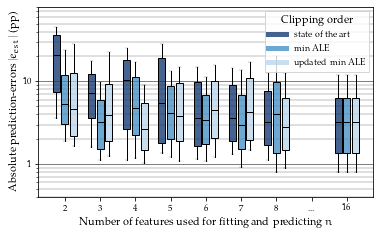

In [25]:
ALE.filename = 'plots/LSD_PHANTOMB'

LSD_PHANTOMB_stats = ALE.plot_feature_clipping(LSD_PHANTOMB_X_test, 
                                               LSD_PHANTOMB_y_test,
                                               clipping_order=['state_of_the_art', 'min_ALE', 'updated_min_ALE'],
                                               n_shown=[2, 3, 4, 5, 6, 7, 8, '...', 16])

Ordered feature indices.

In [26]:
print(LSD_PHANTOMB_stats['state_of_the_art'][0])
print(LSD_PHANTOMB_stats['min_ALE'][0])
print(LSD_PHANTOMB_stats['updated_min_ALE'][0])

[ 0. 13.  2. 11.  4.  9.  6.  7.]
[10.  2.  3. 15. 11.  7. 12.  5.]
[ 8.  0.  2.  3. 11.  7. 15.  5.]


Median absolute errors.

In [27]:
print(LSD_PHANTOMB_stats['state_of_the_art'][3])
print(LSD_PHANTOMB_stats['min_ALE'][3])
print(LSD_PHANTOMB_stats['updated_min_ALE'][3])

[20.69059348  7.2176277  10.35141622  5.42091612  3.5590276   3.59613643
  3.23532644  3.2328459 ]
[5.33081451 3.21199403 4.72234797 4.12551349 3.45102954 2.987272
 4.04446966 3.2328459 ]
[4.69197449 3.90363973 2.66761427 3.82699459 4.54204136 4.30293989
 2.83214964 3.2328459 ]


90th percentile.

In [28]:
print(LSD_PHANTOMB_stats['state_of_the_art'][5])
print(LSD_PHANTOMB_stats['min_ALE'][5])
print(LSD_PHANTOMB_stats['updated_min_ALE'][5])

[45.93500201 17.83712571 25.43086319 28.32868113 15.10926328 14.35124338
 12.70576904 11.84414898]
[24.0384057   9.92203564 17.24669924 13.5000285  11.37740779 13.80000904
 20.18606642 11.84414898]
[28.25580918 22.80408763  9.02116921 14.84903207 15.93427988 16.95991188
 12.44998283 11.84414898]


**PHANTOMC**

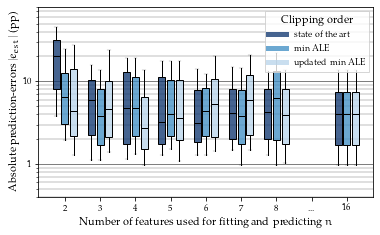

In [29]:
ALE.filename = 'plots/LSD_PHANTOMC'

LSD_PHANTOMC_stats = ALE.plot_feature_clipping(LSD_PHANTOMC_X_test, 
                                               LSD_PHANTOMC_y_test,
                                               clipping_order=['state_of_the_art', 'min_ALE', 'updated_min_ALE'],
                                               n_shown=[2, 3, 4, 5, 6, 7, 8, '...', 16])

Ordered feature indices.

In [30]:
print(LSD_PHANTOMC_stats['state_of_the_art'][0])
print(LSD_PHANTOMC_stats['min_ALE'][0])
print(LSD_PHANTOMC_stats['updated_min_ALE'][0])

[ 0. 13.  2. 11.  4.  9.  6.  7.]
[10.  2.  3. 15. 11.  7. 12.  5.]
[ 8.  0.  2.  3. 11.  7. 15.  5.]


Median absolute errors.

In [31]:
print(LSD_PHANTOMC_stats['state_of_the_art'][3])
print(LSD_PHANTOMC_stats['min_ALE'][3])
print(LSD_PHANTOMC_stats['updated_min_ALE'][3])

[20.20380792  5.92816316  4.7492819   3.21149822  3.11397329  4.12727373
  4.24440565  3.97710025]
[6.45719    3.83718284 4.72234797 4.03621913 4.3726265  3.78800586
 6.22736117 3.97710025]
[4.32316049 4.5929463  2.72921532 3.59542058 5.36830905 5.93856877
 3.87831877 3.97710025]


90th percentile.

In [32]:
print(LSD_PHANTOMC_stats['state_of_the_art'][5])
print(LSD_PHANTOMC_stats['min_ALE'][5])
print(LSD_PHANTOMC_stats['updated_min_ALE'][5])

[45.82423871 15.65384694 19.24791736 17.74833395 14.13423273 14.80308461
 13.23478849 13.89674723]
[24.41470884 13.74777097 19.32971754 17.80110505 12.1899675  14.39124111
 21.89229766 13.89674723]
[27.77351803 23.76684776 13.64268121 17.85931764 19.97901428 20.60249317
 13.57793835 13.89674723]


## Multiple illumination learned spectral decoloring (MI-LSD) for sO2

In [5]:
ALE.filename = 'plots/MI_LSD_SET03_sO2'
ALE.X_train = MI_LSD_SET03_sO2_X_train
ALE.y_train = MI_LSD_SET03_sO2_y_train
ALE.num_illum = 4

### Plotting the ALE functions

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


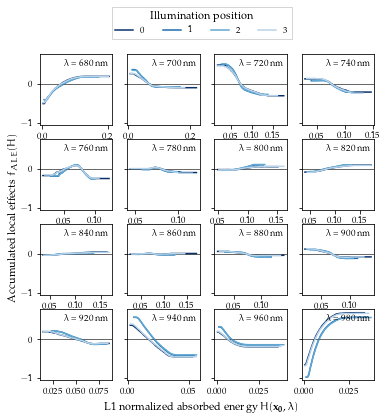

In [6]:
ALE.plot_ALE_function(illum_pos=[0, 1, 2, 3])

### Plotting the 'feature clipping' MAE-progressions
**SET03_sO2**

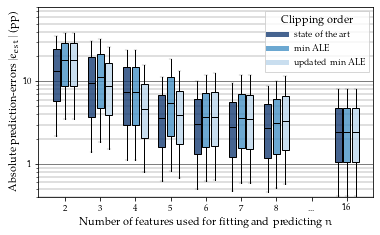

In [7]:
MI_LSD_SET03_sO2_stats = ALE.plot_feature_clipping(MI_LSD_SET03_sO2_X_test,
                                                   MI_LSD_SET03_sO2_y_test,
                                                   illum_pos=[0, 1, 2, 3],
                                                   clipping_order=['state_of_the_art', 'min_ALE', 'updated_min_ALE'],
                                                   n_shown=[2, 3, 4, 5, 6, 7, 8, '...', 16])

Ordered feature indices.

In [8]:
print(MI_LSD_SET03_sO2_stats['state_of_the_art'][0])
print(MI_LSD_SET03_sO2_stats['min_ALE'][0])
print(MI_LSD_SET03_sO2_stats['updated_min_ALE'][0])

[ 0. 13.  2. 11.  4.  9.  6.  7.]
[13.  2.  0.  4. 14.  1. 12.  9.]
[15.  6.  3.  2.  7.  5.  8.  9.]


Median absolute errors.

In [9]:
print(MI_LSD_SET03_sO2_stats['state_of_the_art'][3])
print(MI_LSD_SET03_sO2_stats['min_ALE'][3])
print(MI_LSD_SET03_sO2_stats['updated_min_ALE'][3])

[13.30168606  9.46686606  7.3853747   3.5893502   3.09029677  2.81235539
  2.70178551  2.43413469]
[18.12660692 11.23950008  7.3853747   5.44864357  3.73513358  3.60501799
  3.10254897  2.43413469]
[18.12726613  8.83336134  4.68800982  3.93392683  3.71543162  3.47929779
  3.35040445  2.43413469]


90th percentile.

In [10]:
print(MI_LSD_SET03_sO2_stats['state_of_the_art'][5])
print(MI_LSD_SET03_sO2_stats['min_ALE'][5])
print(MI_LSD_SET03_sO2_stats['updated_min_ALE'][5])

[35.27439853 30.98204881 24.12918781 11.24019333 10.20119202  9.4410045
  8.84905     8.07114801]
[38.54115813 32.22029687 24.12918781 18.53327581 12.07239015 11.78001242
 10.07922048  8.07114801]
[38.54421026 25.8912628  15.87117072 13.29959677 12.61205252 11.79282202
 11.47596034  8.07114801]


## Learned spectral decoloring (LSD) for sO2

In [11]:
ALE.filename = 'plots/LSD_SET03_sO2'
ALE.X_train = LSD_SET03_sO2_X_train
ALE.y_train = LSD_SET03_sO2_y_train
ALE.num_illum = 1

### Plotting the ALE functions

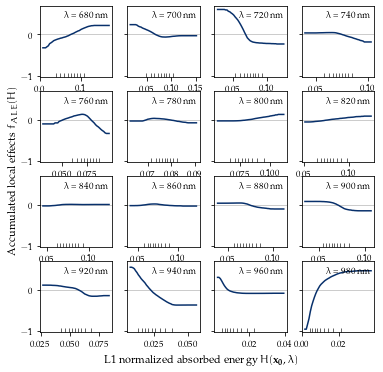

In [12]:
ALE.plot_ALE_function()

### Plotting the 'feature clipping' MAE-progressions
**SET03_sO2**

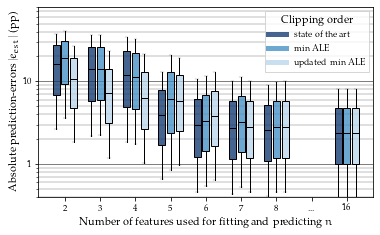

In [13]:
LSD_SET03_sO2_stats = ALE.plot_feature_clipping(LSD_SET03_sO2_X_test,
                                                LSD_SET03_sO2_y_test,
                                                clipping_order=['state_of_the_art', 'min_ALE', 'updated_min_ALE'],
                                                n_shown=[2, 3, 4, 5, 6, 7, 8, '...', 16])

Ordered feature indices.

In [14]:
print(LSD_SET03_sO2_stats['state_of_the_art'][0])
print(LSD_SET03_sO2_stats['min_ALE'][0])
print(LSD_SET03_sO2_stats['updated_min_ALE'][0])

[ 0. 13.  2. 11.  4.  9.  6.  7.]
[13.  2.  4.  0. 14.  1. 12.  8.]
[14. 13.  2. 10.  1.  4. 12.  8.]


Median absolute errors.

In [15]:
print(LSD_SET03_sO2_stats['state_of_the_art'][3])
print(LSD_SET03_sO2_stats['min_ALE'][3])
print(LSD_SET03_sO2_stats['updated_min_ALE'][3])

[16.03040791 14.03443575 11.9316729   3.93208538  2.94005262  2.76454598
  2.57635084  2.34213598]
[19.41254016 14.16181871 11.24847706  6.15535824  3.33243723  3.25144106
  2.81295608  2.34213598]
[10.59923861  7.23163429  6.20237078  5.81166533  3.79386358  2.8187762
  2.8199396   2.34213598]


90th percentile.

In [16]:
print(LSD_SET03_sO2_stats['state_of_the_art'][5])
print(LSD_SET03_sO2_stats['min_ALE'][5])
print(LSD_SET03_sO2_stats['updated_min_ALE'][5])

[37.45328461 36.78473288 34.04257965 13.01874802 10.59935286  9.9836726
  9.00272881  8.12469413]
[40.37248478 36.41408079 32.19395583 20.93049063 11.65441854 11.33485088
  9.87203607  8.12469413]
[26.90822726 23.01156787 21.14851477 19.34369312 13.14720173 10.18617187
 10.17566958  8.12469413]


## Other clipping orders

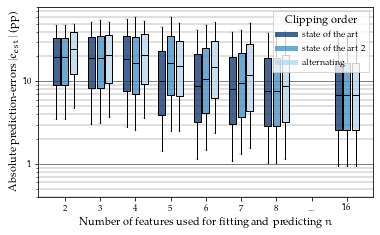

In [17]:
ALE.filename = 'plots/MI_LSD_SET03_sO2_alternatives'

MI_LSD_SET03_sO2_stats_2 = ALE.plot_feature_clipping(MI_LSD_SET03_sO2_X_test,
                                                     MI_LSD_SET03_sO2_y_test,
                                                     illum_pos=[0, 1, 2, 3],
                                                     clipping_order=['state_of_the_art', 'state_of_the_art_2', 'alternating'],
                                                     n_shown=[2, 3, 4, 5, 6, 7, 8, '...', 16])